# Coursework2 - PDE4433 - Ashwin Murali Thanalapati / M01037932

## Global imports

In [19]:
import os
import tensorflow as tf
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


## Load the Dataset from Terrains folder

In [20]:
dataset_path = 'Terrains'

# Get the list of classes from the dataset directory
classes = [f for f in os.listdir(dataset_path) if f!= '.DS_Store']
print(f"Classes: {classes}")
num_classes = len(classes)

images = []
labels = []
img_height = 128
img_width = 128

# Loop through each class folder
for i, terrain_type in enumerate(classes):
    # Define the path to the current class folder
    class_path = os.path.join(dataset_path, terrain_type)

    # Get the list of image files in the current class folder
    image_files = os.listdir(class_path)

    # Loop through each image file
    for image_file in image_files:
        # Define the path to the current image file
        image_path = os.path.join(class_path, image_file)

        # Load the image using PIL
        img = Image.open(image_path).convert('RGB')

        # Resize the image to a fixed size (e.g., 128x128)
        img = img.resize((img_height, img_width))

        # Convert the image to a numpy array and normalize it
        img_array = np.array(img) / 255.0

        # Append the image array to the images list
        images.append(img_array)

        # Append the label (class index) to the labels list
        labels.append(i)

# Convert the lists to numpy arrays
images_np = np.array(images)
labels_np = np.array(labels)

# Print the shapes of the images and labels arrays
print("Images shape:", images_np.shape)
print("Labels shape:", labels_np.shape)

Classes: ['Forest', 'Plains', 'Mountain', 'Desert']
Images shape: (3196, 128, 128, 3)
Labels shape: (3196,)


## Train the model

Training images shape: (2556, 128, 128, 3)
Training labels shape: (2556,)
Testing images shape: (640, 128, 128, 3)
Testing labels shape: (640,)
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6203 - loss: 0.8756 - val_accuracy: 0.8359 - val_loss: 0.5166
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8568 - loss: 0.3761 - val_accuracy: 0.8109 - val_loss: 0.5034
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8524 - loss: 0.3744 - val_accuracy: 0.7703 - val_loss: 0.5465
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9072 - loss: 0.2652 - val_accuracy: 0.8813 - val_loss: 0.3580
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9217 - loss: 0.2313 - val_accuracy: 0.8906 - val_loss: 0.2977
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9423 - loss: 0.1754 - val_accuracy: 0.8734 - val_loss: 0.3998
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9324 - loss: 0.1753 - val_acc

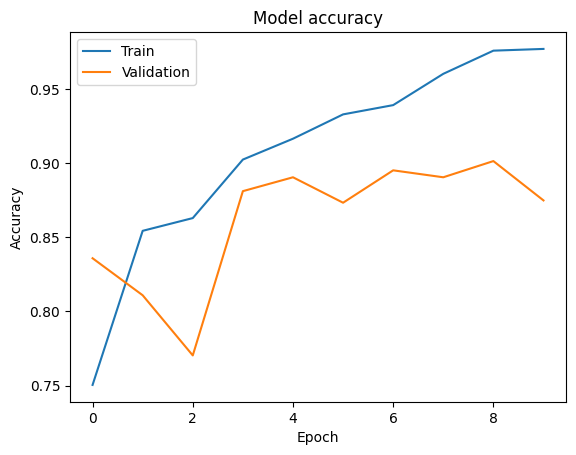

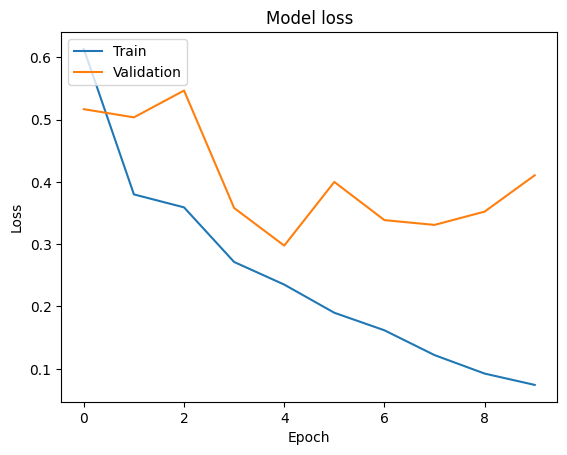

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_np, labels_np, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# save the model
model.save('terrain_classification_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Run Predictions

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


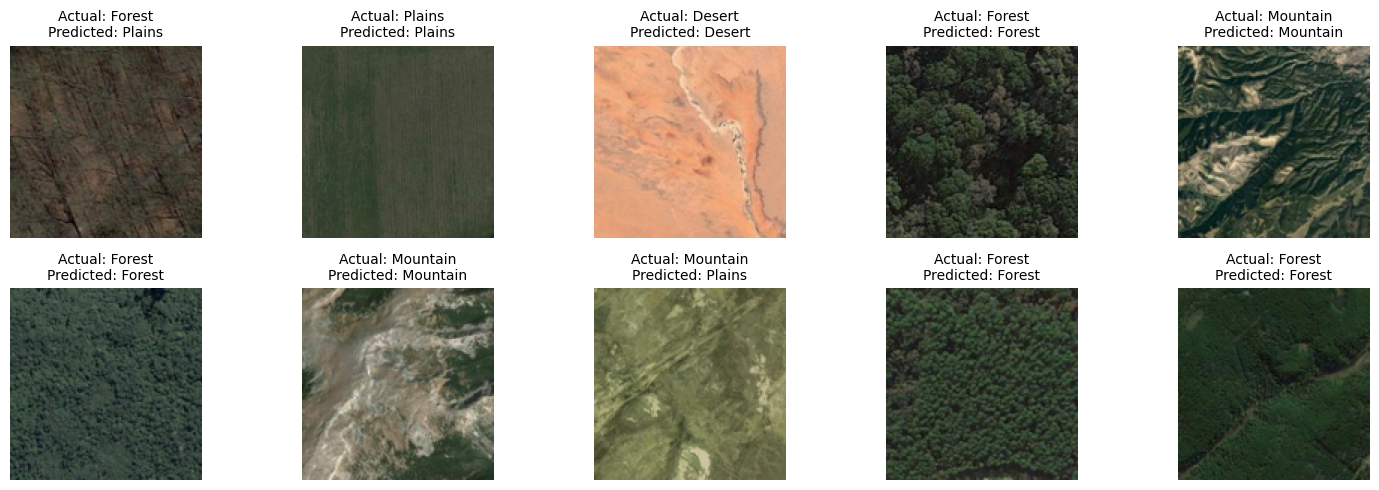

In [22]:
"""
We pick 10 random images from the dataset and display them to compare
what the actual image class is vs what the trained model has predicted.

Based on the accuracy of the model as show in the graph above, we can estimate
that the model should be able to predict max 2 wrong image out of 10 (~ 88% - 90% accuracy).

We can optimize for improvements in the algorithm and model tuning for future enhancements.
At this point, any additional training run will result in overfitting.
"""
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Number of images to display
num_images_to_show = 10

plt.figure(figsize=(15, 5))

random_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(2, num_images_to_show // 2, i + 1)
    plt.imshow(X_test[idx])

    # Get actual and predicted class names
    actual_class = classes[y_test[idx]]
    predicted_class = classes[predicted_classes[idx]]

    # Set title with actual and predicted labels
    plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Print Classification Report

In [23]:
print("Classification Report:")
print(classification_report(y_test, predicted_classes, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

      Forest       0.97      0.88      0.92       190
      Plains       0.91      0.97      0.94       155
    Mountain       0.81      0.81      0.81       134
      Desert       0.93      0.95      0.94       161

    accuracy                           0.91       640
   macro avg       0.90      0.91      0.90       640
weighted avg       0.91      0.91      0.91       640



## Run Prediction for random image to test

In [24]:
# Testing prediction for a given image

def predict_terrain(image_path):
    img = Image.open(image_path)
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    this_prediction = model.predict(img_array)
    predicted_class = np.argmax(this_prediction)
    # return classes[predicted_class]

    # Display the image and prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Loaded Image: {image_path}\nPredicted Terrain: {classes[predicted_class]}')
    plt.axis('off')
    plt.show()

    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


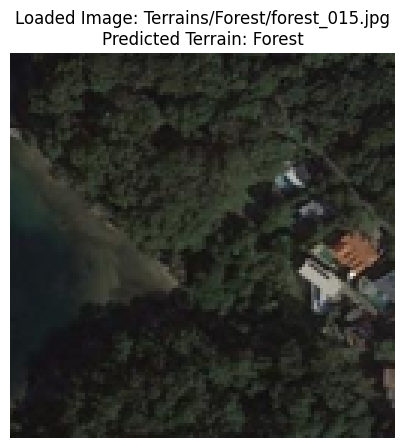

Predicted Terrain:  Forest


In [31]:
"""
The predict_terrain function above takes an image path as input and tries to
predict the terrain type based on the trained model. Once the model has been trained,
It can be used against any image in the terrains folder.
"""

pr_cls = predict_terrain('Terrains/Forest/forest_015.jpg')
print("Predicted Terrain: ", classes[pr_cls])